In [2]:
import pandas as pd

df=pd.read_csv('titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
def title_teil(df):
    erste_aenderung = df['Name'].split(',')[1] # Das Nehmen des Werts der Spalte 'Name' in einer einzelnen Zeile und das Teilen am Komma sowie das Nehmen des zweiten Teils (mit dem Index 1)

    zweite_aenderung = erste_aenderung.split('.')[0] + '.' # Teilen des Restes an Punkt. Das Nehmen des Werts mit Index 0.

    return zweite_aenderung.strip() #Löschen von der Leerzeichens

df['Title'] = df.apply(title_teil, axis =1) # Erstellen einer neuen Spalte und Verwendung der Funktion mit apply
#print(df.head(3)) # Überprüfung, ob die Funktion richtig ist

df['Title'].value_counts() # Häuftigkeit der Title


Title
Mr.              517
Miss.            182
Mrs.             125
Master.           40
Dr.                7
Rev.               6
Col.               2
Mlle.              2
Major.             2
Ms.                1
Mme.               1
Don.               1
Lady.              1
Sir.               1
Capt.              1
the Countess.      1
Jonkheer.          1
Name: count, dtype: int64

**Überlebenswahrscheinlichkeit nach Titel schätzen** \
Verwende die zuvor erstellte  Title -Spalte und berechne für jede Titelkategorieden durchschnilichen Überlebensstatus ( Survived ). 
Nutze  apply  und groupby, um die Überlebensrate nach Titel darzustellen (sorert nach Überlebensrate).



In [4]:
#filtr = df.groupby(['Survived', 'Title'])
def mean_funktion(df):
    return df['Survived'].mean()

#filtr = df.groupby(['Title']).apply(mean_funktion)
#filtr = df.groupby(['Title'])['Survived'].mean()
survival_by_title = df.groupby('Title')['Survived'].apply(lambda x: x.mean())
#print(filtr)
print()
print(survival_by_title )





Title
Capt.            0.000000
Col.             0.500000
Don.             0.000000
Dr.              0.428571
Jonkheer.        0.000000
Lady.            1.000000
Major.           0.500000
Master.          0.575000
Miss.            0.697802
Mlle.            1.000000
Mme.             1.000000
Mr.              0.156673
Mrs.             0.792000
Ms.              1.000000
Rev.             0.000000
Sir.             1.000000
the Countess.    1.000000
Name: Survived, dtype: float64


**Länge der Namen analysieren**
Ersetze die Werte der Spalte  Surveived  mit  alive  bzw. dead. \




In [5]:
df.loc[df['Survived'] == 1, 'Survived'] = 'alive'
df.loc[df['Survived'] == 0, 'Survived'] = 'dead'
df.head(3)


C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_26088\4233697054.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'alive' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Survived'] == 1, 'Survived'] = 'alive'


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,alive,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,alive,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.


Berechne die Anzahl der Zeichen im  Name  jeder Person und erstelle eine neue Spalte  NameLength. 


In [6]:
df['NameLength'] = df.groupby('Title')['Name'].apply(lambda x: x.str.len()).reset_index(drop=True)
#df['NameLength'] = df['Name'].apply(len)

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NameLength
0,1,dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,28
1,2,alive,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,35


Verwende  apply  und besmme die durchschnilicheNamenslänge für Überlebende und Nicht-Überlebende. 

In [7]:
filtr = df.groupby(['Survived'])['NameLength'].mean().round(2)# Durchschnittliche Anzahl der Buchstaben in Name für überlebende und nicht überlebende
filtr

Survived
alive    26.64
dead     27.17
Name: NameLength, dtype: float64

**Überlebensrate basierend auf dem Fahrpreis**
Teile die Passagiere in drei Gruppen anhand des Fahrpreises ( Fare ) auf. 
Überlege,wie du diese Gruppen ungefähr gleichmäßig verteilen kannst. 
Berechne für jededer drei Gruppen die durchschniliche Überlebensrate und gib sie aus. (dasDataFrame kann mit  sort_values(<Spaltenname>)  sorert werden)

In [8]:

durchschnitt = df['Fare'].mean()
min_preis = df['Fare'].min()
max_preis=df['Fare'].max()
print(f'Die durchschnittliche Preis des Tickets ist {durchschnitt.round(2)} Euro, min ist {min_preis}, max ist {max_preis}')

#tauschen Überlebensrat von string zu Zahl
df.loc[df['Survived'] == 'alive', 'Survived'] = 1
df.loc[df['Survived'] == 'dead', 'Survived'] = 0

# Teilen der 'Fare'-Spalte in 3 Gruppen bins= 3
teilen_3_gruppe = pd.cut(df['Fare'], bins=3)

durchschnit_ueberlebensrat = df.groupby(teilen_3_gruppe)['Survived'].mean()

print(durchschnit_ueberlebensrat)

#andere Variante mit Teilung durch Klassen
df.loc[df['Survived'] == 1, 'Survived'] = 'alive'
df.loc[df['Survived'] == 0, 'Survived'] = 'dead'

filtr = df.groupby(['Pclass','Survived'])['Fare'].mean().round(2)

filtr.to_frame()

Die durchschnittliche Preis des Tickets ist 32.2 Euro, min ist 0.0, max ist 512.3292
Fare
(-0.512, 170.776]     0.376579
(170.776, 341.553]    0.647059
(341.553, 512.329]         1.0
Name: Survived, dtype: object


C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_26088\2763682616.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  durchschnit_ueberlebensrat = df.groupby(teilen_3_gruppe)['Survived'].mean()


Fare
Pclass Survived       
1      alive     95.61
       dead      64.68
2      alive     22.06
       dead      19.41
3      alive     13.69
       dead      13.67

In [9]:
#Variant von Andreas
df.loc[df['Survived'] == 'alive', 'Survived'] = 1
df.loc[df['Survived'] == 'dead', 'Survived'] = 0
df_sorted=df.sort_values('Fare')
n = len(df_sorted)
print(n)

# Teilen auf drei Gruppen:
group_size = n // 3
print(group_size)

# Gruppenzuordnung
group_1 = df_sorted.iloc[:group_size]
group_2 = df_sorted.iloc[group_size:2*group_size]
group_3 = df_sorted.iloc[2*group_size:]

# Überlebensrate für jede Gruppe:
survived_g1 = group_1['Survived'].mean()
survived_g2 = group_2['Survived'].mean()
survived_g3 = group_3['Survived'].mean()

# Korrektur der Ausgabetexte
print(f'Überlebensrate für die erste Gruppe: {survived_g1:.2f}')
print(f'Überlebensrate für die zweite Gruppe: {survived_g2:.2f}')
print(f'Überlebensrate für die dritte Gruppe: {survived_g3:.2f}')





891
297
Überlebensrate für die erste Gruppe: 0.20
Überlebensrate für die zweite Gruppe: 0.39
Überlebensrate für die dritte Gruppe: 0.56


**Analyse des Alters basierend auf Überlebensstatus**

Untersuche das Alter (Age) der Überlebenden und Nicht-Überlebenden. 
Berechne für jede Gruppe (Überlebende und Nicht-Überlebende) das Durchschnittsalter sowie den Median. Erstelle einen KDE-Plot mit seaborn, um die Altersverteilung in den beiden Gruppen visuell darzustellen. Die Optionen fill=True und color="<Farbe>" können benutzt werden, um die Fläche unter der Dichtefunktion farbig darzustellen.

In [10]:
df.head(3)

filtr = df.groupby(['Survived'])['Age'].agg(['mean', 'median'])
filtr

,mean,median
Survived,,
0,30.626179,28.0
1,28.343690,28.0


In [11]:
import numpy as np
liste_ueberlebende = df[df['Survived'] == 'alive']['Age'].dropna().tolist()
liste_nicht_ueberlebende = df[df['Survived'] == 'dead']['Age'].dropna().tolist()

# Median berechnen
median_ueberlebende = np.median(liste_ueberlebende)
median_nicht_ueberlebende = np.median(liste_nicht_ueberlebende)
mean_ueberlebende = np.mean(liste_ueberlebende )
mean_nicht_ueberlebende = np.mean(liste_nicht_ueberlebende)
print(f"Median Alter der Überlebenden: {median_ueberlebende}\nDas durchschnittliche Alter: {mean_ueberlebende:.2f}\n")
print(f"Median Alter der Nicht-Überlebenden: {median_nicht_ueberlebende}\nDas durchschnittliches Alter: {mean_ueberlebende:.2f}")


Median Alter der Überlebenden: nan
Das durchschnittliche Alter: nan

Median Alter der Nicht-Überlebenden: nan
Das durchschnittliches Alter: nan


c:\Users\NataliaArchipenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\NataliaArchipenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


               mean  median
Survived                   
0         30.626179    28.0
1         28.343690    28.0


<Axes: xlabel='median', ylabel='mean'>

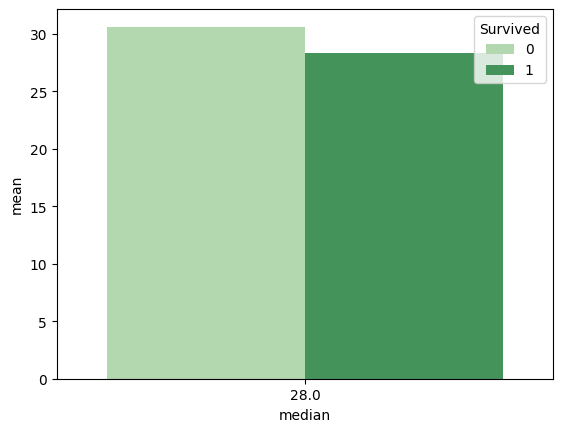

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
print(filtr)
sns.barplot( data=filtr, x='median', y='mean', hue='Survived', palette='Greens')



C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_26088\914045720.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(filtr)


<Axes: ylabel='Density'>

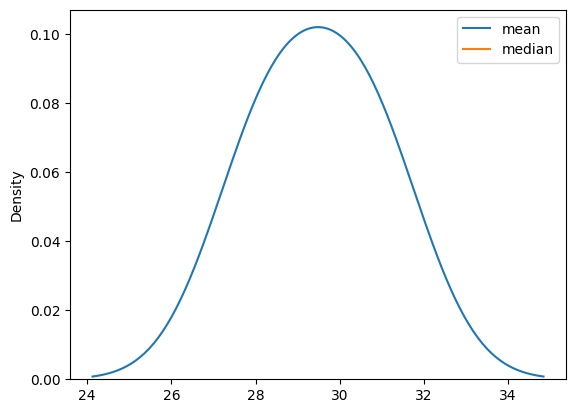

In [27]:
sns.kdeplot(filtr)